# Matplotlib tutorial (Basic) 

`Matplotlib` is a powerful and comprehensive library for creating static, animated, and interactive visualizations in Python. 

This tutorial covers some basic usage patterns and practices to help you get started with Matplotlib：
* A simple example
* Plots in statistics: histograms, density plots, pie charts, bar charts, box plots, and scatter plots
* Time series data visualization: line plots, histograms and density plots, box plots, lag plots, and autocorrelation plots
* 2D plotting methods: images, contour plots, quiver plots, and stream plots

## Installation

You can install `Matplotlib` either using `pip` or `conda`. Open the console and run `pip install matplotlib` for `pip`, or `conda install matplotlib` for `conda`.

To verify that `Matplotlib` is successfully installed on your system, import `Matplotlib` and print its version.

In [219]:
import matplotlib as mpl

print(mpl.__version__)

3.5.1


## Matplotlib architecture

Before diving into using `Matplotlib`, it is necessary to figure out the `Matplotlib` architecture, which can help you avoid some confusions and save your time in learning `Matplotlib`. There is an article explaining `Matplotlib` architecture in detailed:  
*Hunter, J., & Droettboom, M. (2012). [matplotlib](http://www.aosabook.org/en/matplotlib.html) in A. Brown (Ed.), The Architecture of Open Source Applications, Volume II: Structure, Scale, and a Few More Fearless Hacks (Vol. 2).*

There are three main layers in `Matplotlib` architecture:
<img src="https://junye0798.com/post/plt-xxx-or-ax-xxx-that-is-the-question-in-matplotlib/matplotlib-structure.png" style="zoom:40%" />


### Backend Layer

A *[backend](https://matplotlib.org/stable/users/explain/backends.html)* is an abstraction layer which knows how to handle all the heavy works via communicating to the drawing toolkits in your machine, and target different outputs. In the Jupyter Notebook, the IPython magics are the helper functions which set up the environment so that the web based rendering can be enabled. You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. Jupyter notebook uses `inline` backend by default. But `%matplotlib notebook` can provide an interactive environment using `nbAgg` backend. 

For better representation, this tutorial will use `nbAgg` backend for the first several sections. Feel free to select the backend for your preference.

:::{note}
Please remember to run this code cell 👇 so you can switch to an interactive environment which is helpful for following content.
:::

In [291]:
%matplotlib notebook
mpl.get_backend()

'nbAgg'

### Artist Layer

The *[artist](https://matplotlib.org/stable/tutorials/intermediate/artists.html)* layer is what we will spend most of our time working with. There are two types of `artists`: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: `Line2D`, `Rectangle`, `Text`, `AxesImage`, etc., and the containers are places to put them (`Axis`, `Axes` and `Figure`). The standard use is to create a `Figure` instance, use the `Figure` to create one or more `Axes` or `Subplot` instances, and use the `Axes` instance helper methods to create the primitives. 
<table><tr>
<td> <img src="http://www.aosabook.org/images/matplotlib/artists_figure.png" style="zoom:30%" /> </td>
<td> <img src="http://www.aosabook.org/images/matplotlib/artists_tree.png" style="zoom:40%" /> </td>
</tr></table>

### Scripting Layer

The *scripting* layer comprises a collection of command style functions for a quick and easy generation of graphics and plots. The scripting layer we use in this tutorial is called [pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html). It is the easiest part to start with and use, and you can create a figure, create a plotting area in the figure, add up objects (e.g. line, text, rectangle) on top of the figure, etc.

In [221]:
import matplotlib.pyplot as plt
plt.plot?

## Two methods of plotting

In this section, two basic methods of plotting will be illustrated by simple examples.

### Plot with scripting layer: plt.xxx( )

In this case, we can just call one function on a module named `plot`. Then the pyplot scripting interface will manage a lot of objects for us. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the `pyplot` module itself has a function which is called `plot`, but it redirects calls to this function to the current axes object. 

<IPython.core.display.Javascript object>


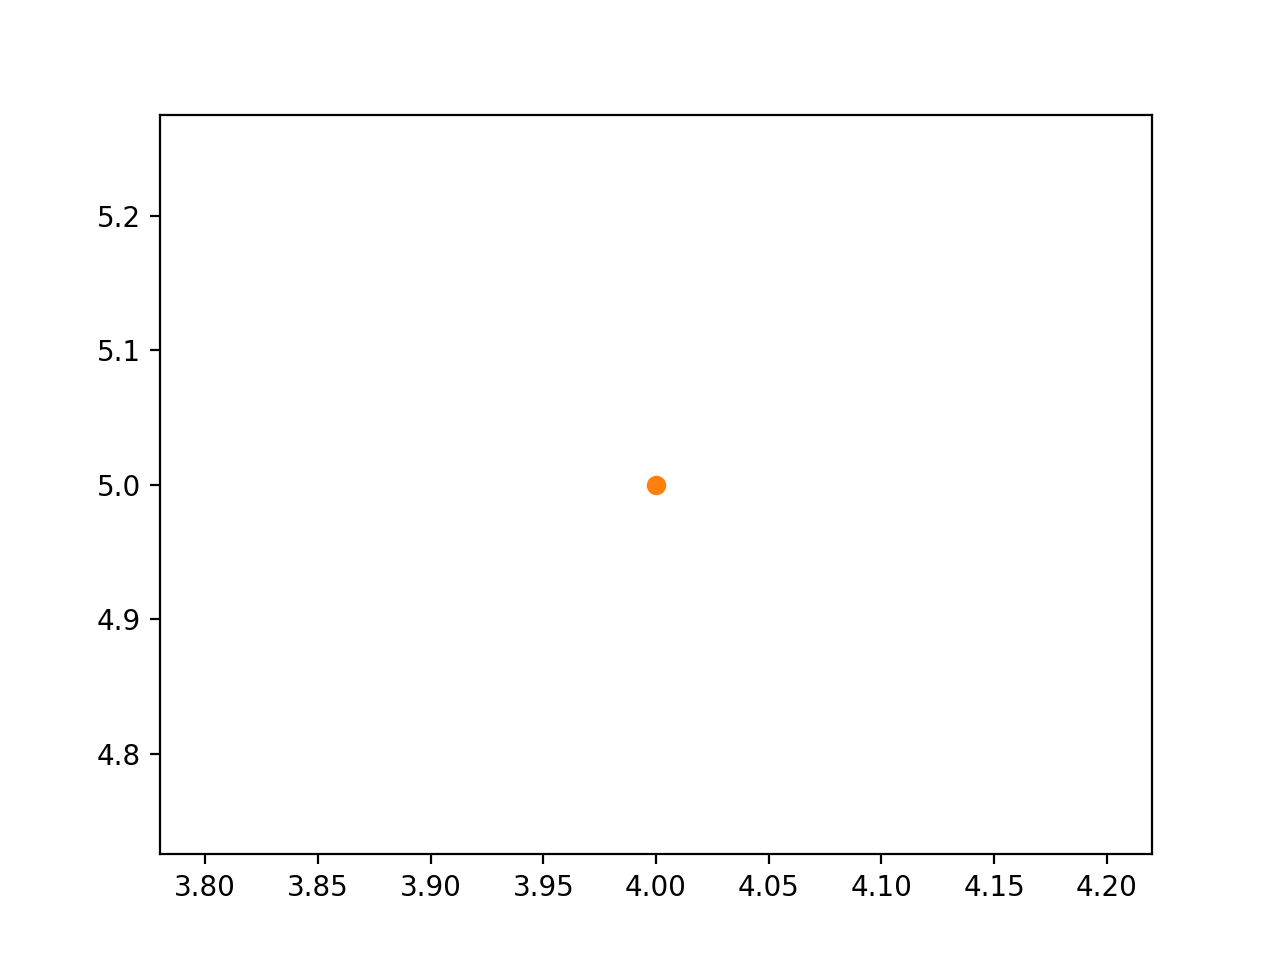

In [299]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (4,5)
plt.figure()  # create a new figure
plt.plot(4, 5)

In [300]:
# we can pass in 'o' to plt.plot to indicate that we want
# the point (4,5) to be indicated with a marker 'o'
plt.plot(4, 5, 'o')

### Plot with artist layer: ax.xxx( )

In this case, we can do more customisation by onbtaining `axes` object and operating on it directly. It is more convenient for advanced plots. Especially when handling multiple figures/axes, you will not get confused as to which one is currently active since every subplot is assign to an `axes`. 

We can obtain axes and figure objects with the help of `pyplot` module, or it will be onerous. Two basic ways to do this:  
(1) `fig = plt.figure()`, `ax = plt.gca()`    
(2) `fig, ax = plt.subplots()`  

<IPython.core.display.Javascript object>


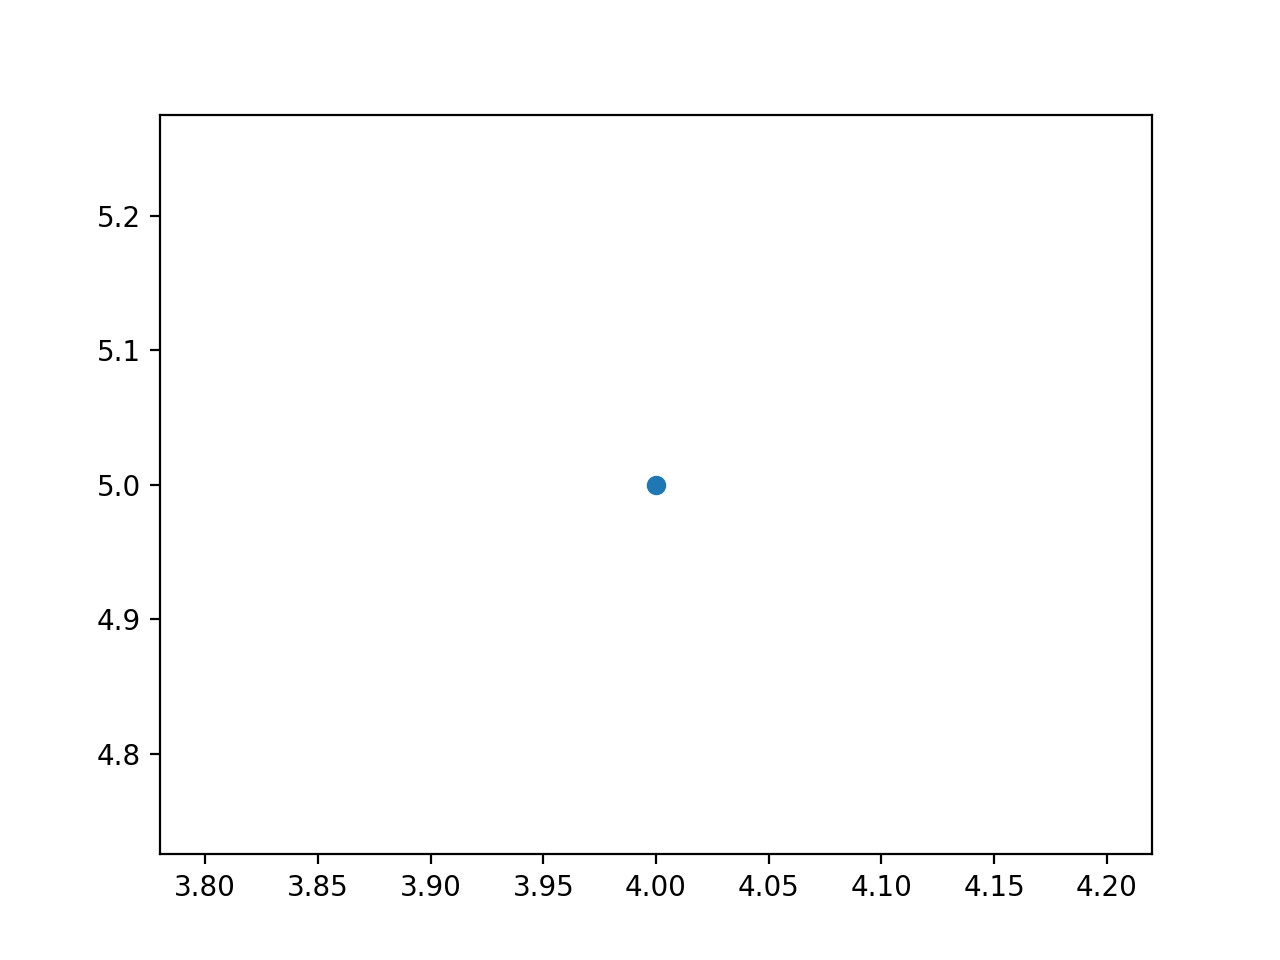

In [301]:
fig = plt.figure()  # create a new figure
ax = plt.gca() # obtain axes object
ax.plot(4, 5, 'o')   # plot the point (4,5)

The latter way is recommended, especially when you have multiple subplots, it can return `ax` as an array, and it is convenient for you to handle each ax using `ax[i]` in the iteration. You can decide how many rows and columns of subplots in your figure at the beginning using [`plt.subplots(nrows, ncolumns)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). You can also control sharing of properties among x (`sharex`) or y (`sharey`) axes, specify the size of each subplot (`figsize`).

<IPython.core.display.Javascript object>


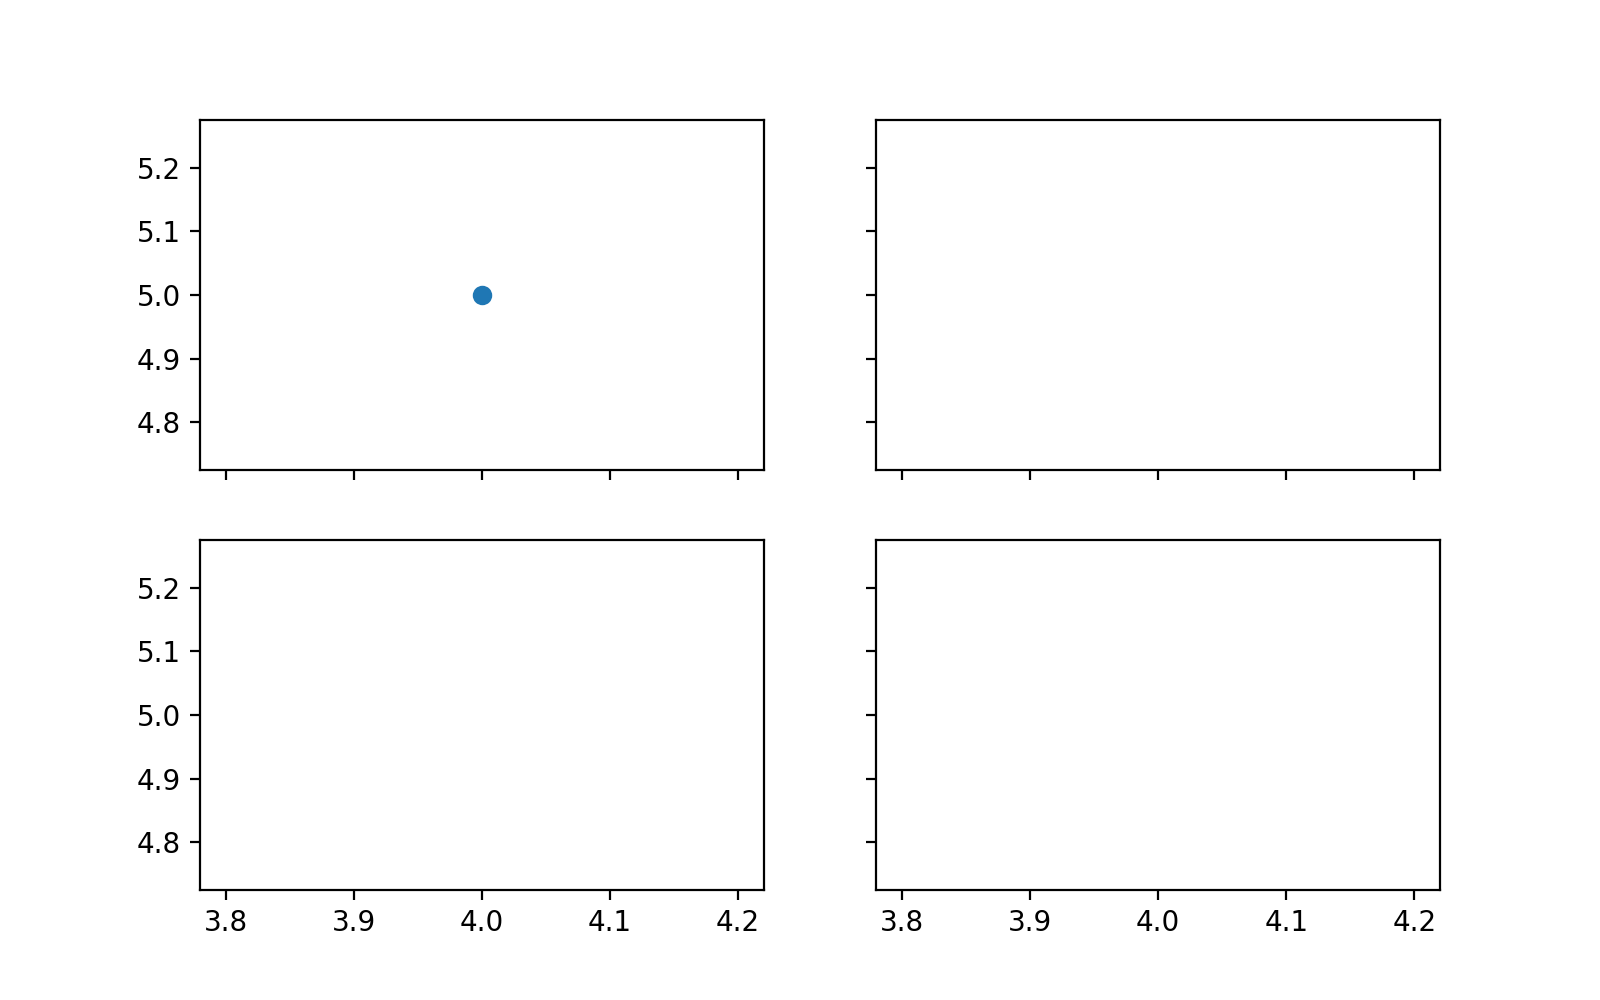

In [302]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 5))
ax[0,0].plot(4,5, 'o')

Although sometimes the code of artist layer plotting is more verbose than that of scripting layer plotting, it is easier to read. This is a very important practice to let you produce quality code and increase the readability of your code. So taken together, we may use `plt.xxx( )` to quickly get a plot for exploratory data analysis, however, `ax.xxx( )` is a go-to style when your code is part of a serious project and need to be shared with others.

## Workflow example of visualization

This section shows a workflow of basic visualization example. This is just to give you a intuitive impression and it doesn't mean that you should follow this workflow 100 percent. Feel free to explore more about operations to design your own visualization.

:::{note}
In this section, please run the code cells step by step and you can see the process of building a figure and plot your data. This will help you avoid some problems.
:::

1. First, prepare data for visualization

In [303]:
import numpy as np
import pandas as pd

# np.array
linear_data = np.linspace(1, 8, 8)
exponential_data = linear_data**2
print(linear_data)
print(exponential_data)

# dataframe
df = pd.DataFrame({'linear': linear_data,
                   'exponent': exponential_data},
                 index=range(1, 9))
print(df)

[1. 2. 3. 4. 5. 6. 7. 8.]
[ 1.  4.  9. 16. 25. 36. 49. 64.]
   linear  exponent
1     1.0       1.0
2     2.0       4.0
3     3.0       9.0
4     4.0      16.0
5     5.0      25.0
6     6.0      36.0
7     7.0      49.0
8     8.0      64.0


2. Then, choose suitable [type](https://matplotlib.org/stable/plot_types/index.html) of graph (line, bar, histogram, heatmap, etc) and plot the data

This example shows some features about `pyplot.plot`:   

(1) if we only give y-axes values to our plot call, no x-axes values, then the `plot` function is smart enough to figure out what we want is to use the index of the series as the x-axes value. So you can directly give a `dataframe` or `series` to `plot` function. Also, you can point out what is the y-axes values and what is the x-axes values to make it clear.  
(2) when more than one series of data are given to the `plot` function, it can identify these multiple series of data and color the data from different series differently to distinguish.

<IPython.core.display.Javascript object>


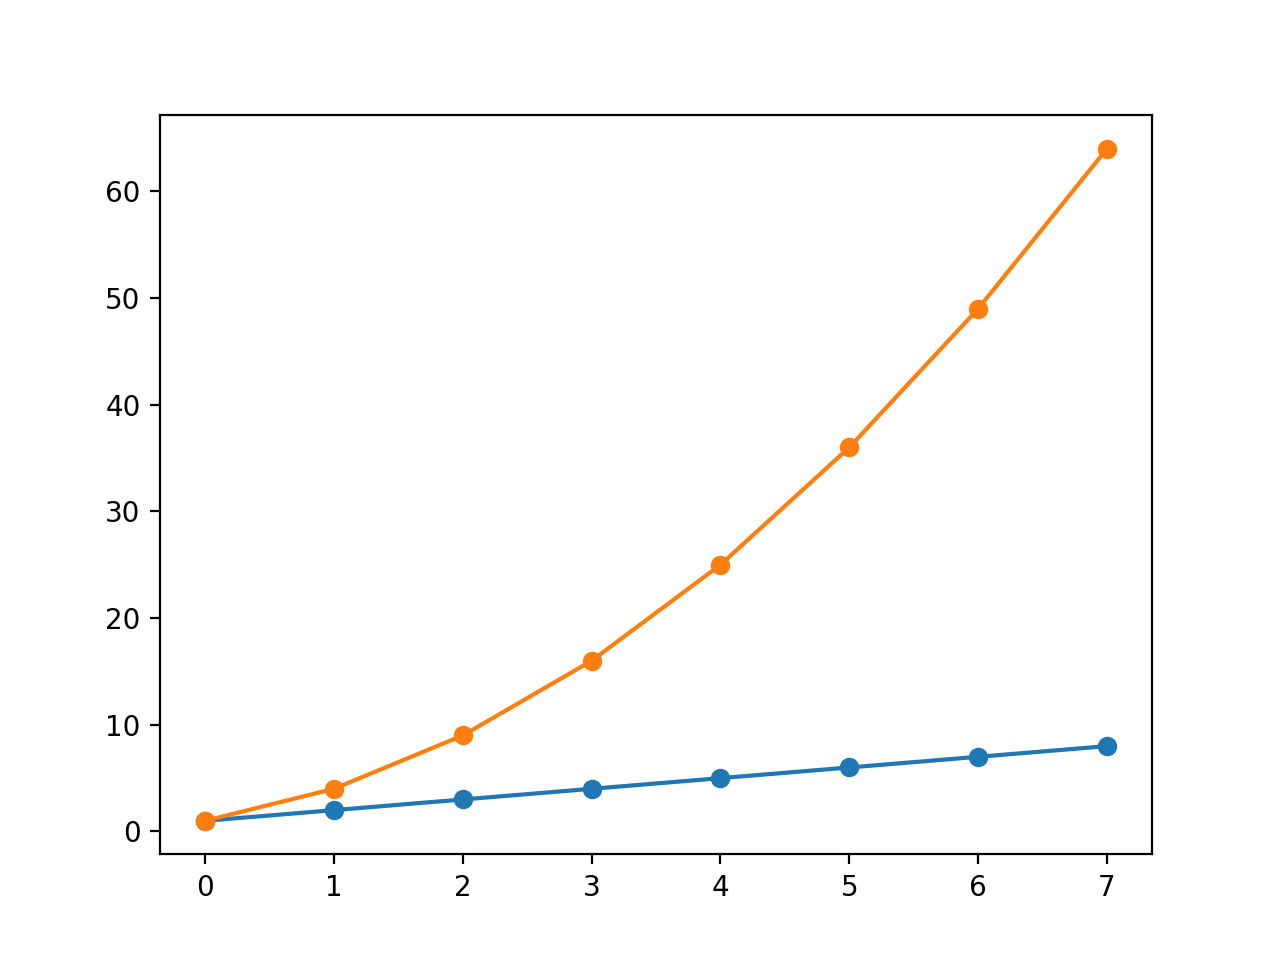

In [304]:
# plot the data with np.array type
# without given x-axes valuse, x values will be started at 0 by default
# plt.subplots() == plt.subplots(1,1,1) == plt.subplots(111)
fig, ax = plt.subplots()
# plot the linear data and the exponential data
ax.plot(linear_data, '-o', exponential_data, '-o')

<IPython.core.display.Javascript object>


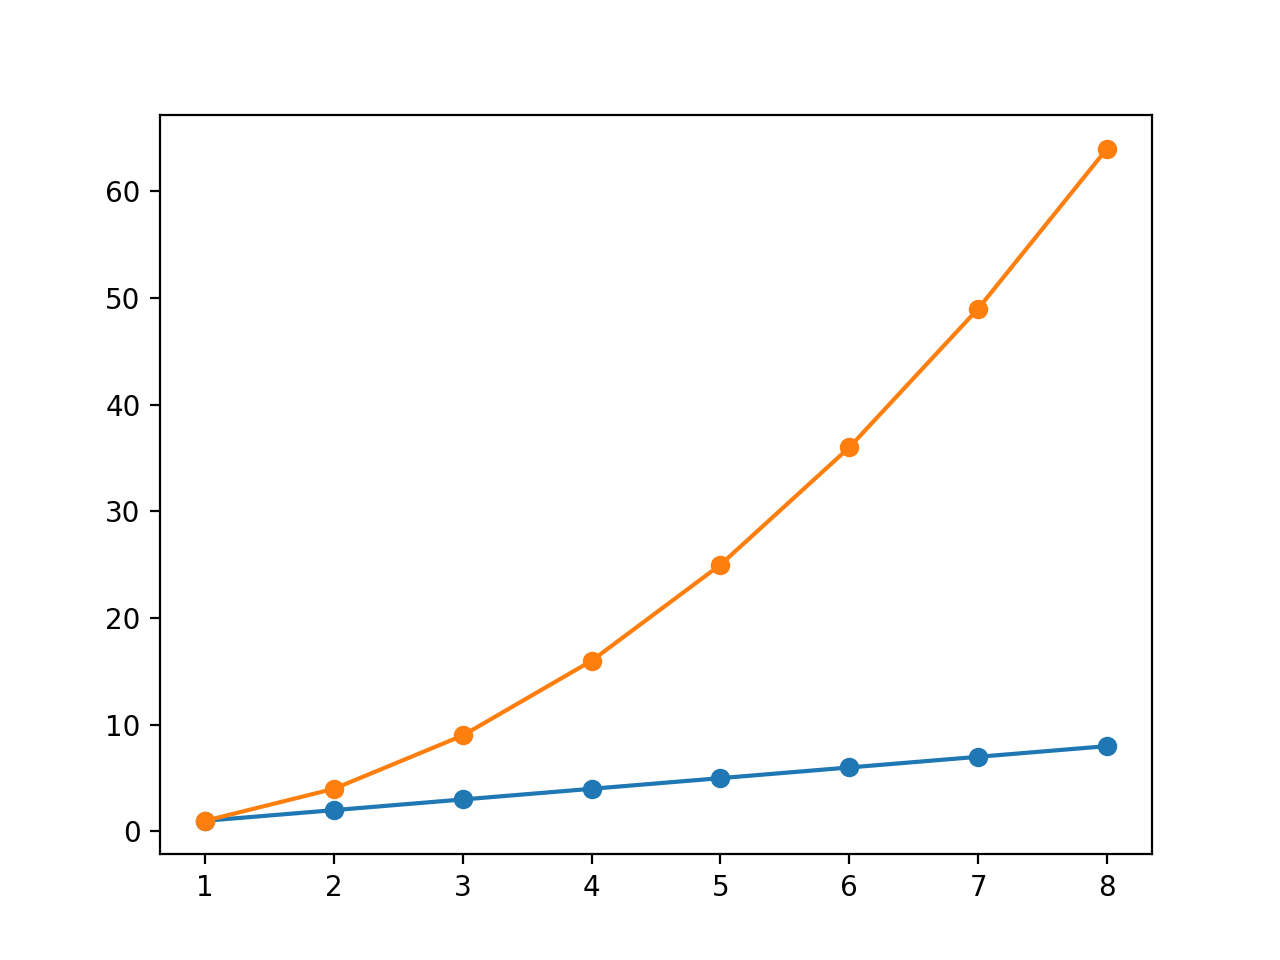

In [305]:
# plot the data with dataframe type
fig, ax = plt.subplots()
ax.plot(df, '-o')

<IPython.core.display.Javascript object>


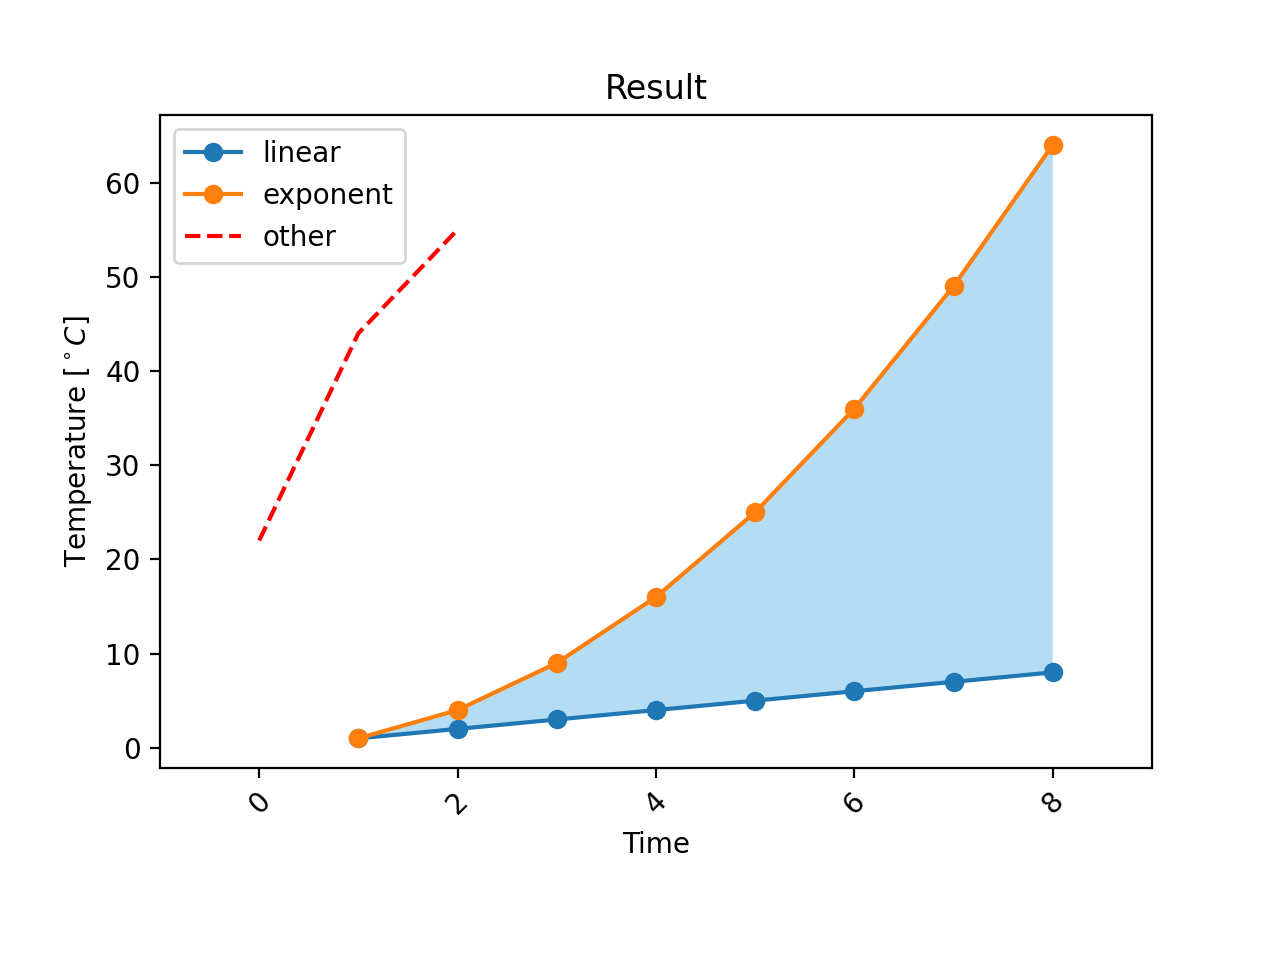

In [306]:
# plot the data by pointing out x and y value
fig, ax = plt.subplots()
ax.plot(df.index, df.values, '-o')

:::{note}
Please note that figure shown here is built and embellised by following cells step by step. If you just run the one code cell above, the figure will be the same as the last figure.
:::

3. Add more data

Sometimes we will get extra data and would like to add it to the figure to represent more information. We can direcetly plot extra graphs in the **current** figure using `plt.xxx()`. At the same time, we can specify some properties of the graphs, such as color, linestyle, alpha, label, etc. Because there are so many properties that we can not remember all of them, checking out the official [documnet](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) is a good way when you want to design something specific.

In [307]:
# plot another series with a dashed red line
ax.plot([22,44,55], '--r')

4. Add elements to provide necessary information

It is neceaary to provide some information, such as xlable, ylable, title, legend, etc. Without these, readers will feel confused about your figure.
Also, you can specify the properties of these elements to control their location, size, etc. You can add mathematical expressions in any text element in [Markdown](https://www.markdownguide.org/) format.

In [310]:
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [$^\circ C$]')
ax.set_title('Result')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
ax.legend(list(df.columns)+['other'])

5. Embellish your plot

Visual embellishment can benefit comprehension and memorability of charts (relative [research](https://www.researchgate.net/publication/221517808_Useful_Junk_The_effects_of_visual_embellishment_on_comprehension_and_memorability_of_charts) here). For example, we can highlight the difference between linear and exponent curves here using [`fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) function.

In [311]:
# fill the area between the linear data and exponential data
ax.fill_between(df.index, 
                linear_data, exponential_data, 
                facecolor='#56B4E9',  # you can specify the color you like 
                alpha=0.25)           

Sometimes, we also need to modify the existed elements in the figure. For example, we can change y-axes limits using `plt.ylim( )` or `ax.set_ylim( )`, rotate the tick labels for aixs, adjust the subplot so the text doesn't run off the image using `plt.subplots_adjust( )`, and so on. But remember that just do it when you need it.

In [312]:
ax.set_xlim(-1,9)
ax.tick_params(axis='x', labelrotation=45)
plt.subplots_adjust(bottom=0.2)

💡 Last but not least, it is impossible to enumerate all the properties, functions and operations. So please explore more in Google and see yourself as a desginer to visualize all the information you want. Enjoy the journey of creaction and designing! 

## Plots in statistics 

In this section, some commonly used plots in statistics will be introduced, including histograms, density plots, pie charts, bar charts, box plots, and scatter plots.

### Histograms

A histogram represents the distribution of a continuous variable. The `hist()` function automatically generates histograms and returns the bin counts or probabilities. 

Let's randomly generate some data with mean $\mu$ and standard deviation $\sigma$ to see the distribution. 

:::{note}
Run this code cell 👇 to switch back to inline mode.
:::

In [262]:
%matplotlib inline
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

Text(0.5, 1.0, 'Histogram: $\\mu=100$, $\\sigma=15$')

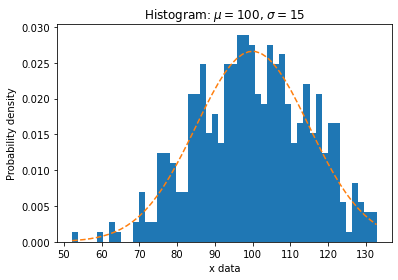

In [263]:
np.random.seed(20)   # Fixing random state for reproducibility

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(450)  # Return 450 samples from the standard normal distribution

num_bins = 50  # number of bins for the histogram

# plot the histogram of the data
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, num_bins, density=True) 
# n: array, the values of the histogram bins.
# bins: array, the edges of the bins.
# density: If True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))  # the analytical formula of the normal distribution
ax.plot(bins, y, '--')
ax.set_xlabel('x data')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=100$, $\sigma=15$')

### Density plots

Density plots give us an idea of the shape of the distribution of observations. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution.

There are many ways to generate the density plot. Here we plot it directly by estimating the density function from the given data using the `gaussian_kde()` method from the `scipy.stats` module. Another way is to set `kind='density'` in `pandas.DataFrame.plot()` method, which will be discussed later in the section of Time series data visualization.

Text(0.5, 1.0, 'Histogram: $\\mu=100$, $\\sigma=15$')

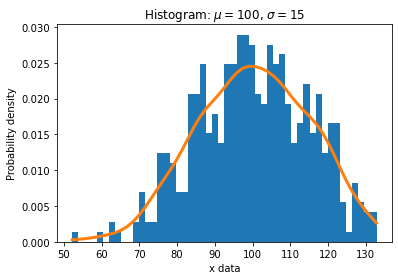

In [264]:
from scipy.stats import kde

# kernel-density estimate using Gaussian kernels
density = kde.gaussian_kde(x)
y = density(bins)

# plot the histogram of the data
fig, ax = plt.subplots()
n, bins, _ = ax.hist(x, num_bins, density=True) 
ax.plot(bins, y, linewidth=3)
ax.set_xlabel('x data')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=100$, $\sigma=15$')

### Pie charts

Pie charts illustrate the proportions of categorical variables. The `pie()` function automatically generates pie charts.

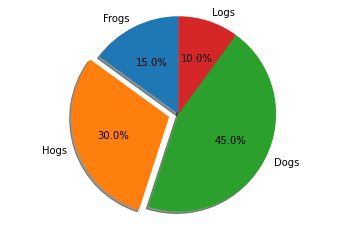

In [265]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Bar charts

Bar charts are useful for visualizing counts, or summary statistics with error bars. Use `bar()` or `barh()` function for bar charts or horizontal bar charts.

<BarContainer object of 3 artists>

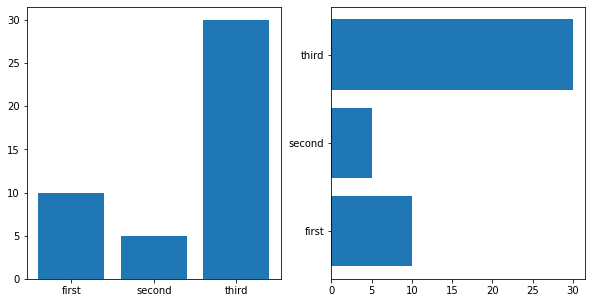

In [266]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

You may also plot grouped bar charts with labels by customizing labels and x-axis tick labels.

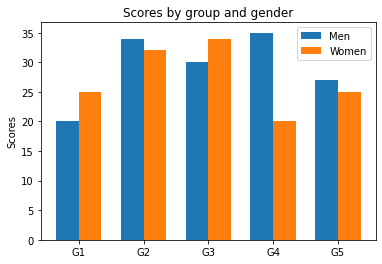

In [267]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adds the value labels to bars. This is only available for Matplotlib 3.4 or above
# ax.bar_label(rects1, padding=3)  
# ax.bar_label(rects2, padding=3)

### Box plots

Box plots provide insight into distribution properties of the data. The `boxplot()` function makes a box and whisker plot for each column of the input. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. 

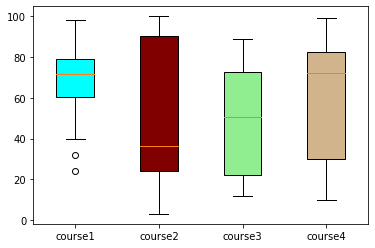

In [268]:
value1 = [82, 76, 24, 40, 67, 62, 75, 78, 71, 32, 98, 89, 78, 67, 72, 82, 87, 66, 56, 52] 
value2 = [62, 5, 91, 25, 36, 32, 96, 95, 3, 90, 95, 32, 27, 55, 100, 15, 71, 11, 37, 21] 
value3 = [23, 89, 12, 78, 72, 89, 25, 69, 68, 86, 19, 49, 15, 16, 16, 75, 65, 31, 25, 52] 
value4 = [59, 73, 70, 16, 81, 61, 88, 98, 10, 87, 29, 72, 16, 23, 72, 88, 78, 99, 75, 30] 
 
box_plot_data = [value1, value2, value3, value4]

# plot
fig, ax = plt.subplots()
box = ax.boxplot(box_plot_data, vert=True, patch_artist=True, labels=['course1', 'course2', 'course3', 'course4'])
# vert=True, draw vertical boxes
# patch_artist=True, produce boxes with Patch artists

colors = ['cyan', 'maroon', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

### Scatter plots

Scatter plots show the extent of correlation between two variables on horizontal and vertical axes. To make a scatter plot, use `scatter()` function. The color, size, and style of the markers could be changed according to your need.

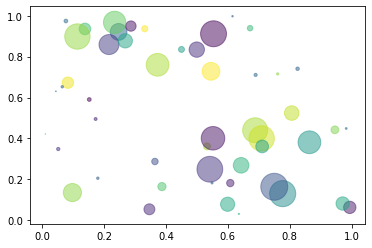

In [269]:
np.random.seed(19)  # Fixing random state for reproducibility

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

fig, ax = plt.subplots()
ax.scatter(x, y, s=area, c=colors, alpha=0.5)
# s, size
# c, color
# alpha, transparency

## Time series data visualization

There are multiple ways to visualize the time series data. Here, we will take the dataset of 'Daily rainfall of Changi station' as an example to demonstrate some simple and useful methods.

First, read the data from csv file and check the contents. Remember to set `parse_dates=True` to convert the index column to datetime. You may also parse specific column(s) by e.g. `parse_dates=[1, 2, 3]`.

In [270]:
import pandas as pd

# read the dataset from csv
fn = '../../assets/data/Changi_daily_rainfall.csv'
# './python-climate-visuals-master/assets/data/Changi_daily_rainfall.csv'
df = pd.read_csv(fn, index_col=0, header=0, parse_dates=True)

# only use the data in 2020
df_2020 = df.loc['2020',:]
# show the head of the dataframe
df_2020.head()

# df_2020['Daily Rainfall Total (mm)']  # You may uncomment this to see what they are
# df_2020.index  

,Daily Rainfall Total (mm)
Date,
2020-01-01,0.0
2020-01-02,0.0
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0


### Line plots

The Line plot is one of the most basic visualizations in time series analysis. You may use `plot_date()` function, which is similar to `plot()` where the input is x and y pair.

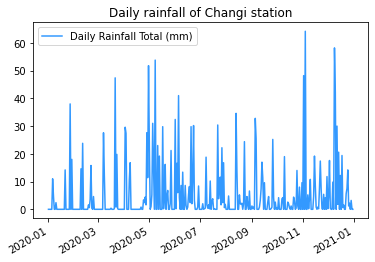

In [271]:
fig, ax = plt.subplots()
ax.plot_date(df_2020.index, df_2020['Daily Rainfall Total (mm)'], linestyle ='solid', fmt='none', color='#3399ff')
ax.set_title('Daily rainfall of Changi station')
ax.legend(df_2020)
fig.autofmt_xdate()  # This automatically rotate the x labels

Alternatively as introduced in Pandas Tutorial (Advanced), this could also be achieved by:

<AxesSubplot:title={'center':'Daily rainfall of Changi station'}, xlabel='Date'>

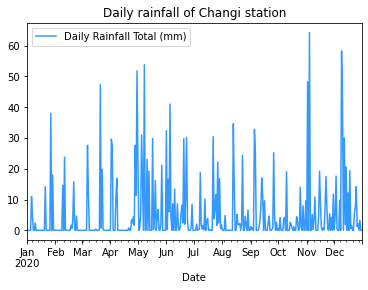

In [272]:
df_2020.plot(title='Daily rainfall of Changi station', color='#3399ff')

You may show comparisons of time series in different years by the method of `dataframe.plot()` mentioned above (and `groupby()` function introduced in Pandas Tutorial (Advanced)). However, the following codes need to assure that the data length of each subplot is the same, i.e., it can only handle 365 days in a year.

In [273]:
df_2017_2019 = df.loc[(df.index >= '2017-01-01')
                     & (df.index < '2020-01-01')]
df_2017_2019['Daily Rainfall Total (mm)'].head()

Date
2017-01-01    0.8
2017-01-02    0.0
2017-01-03    0.6
2017-01-04    2.8
2017-01-05    0.6
Name: Daily Rainfall Total (mm), dtype: float64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

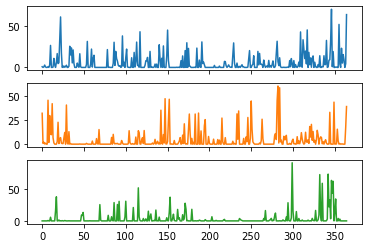

In [274]:
groups = df_2017_2019['Daily Rainfall Total (mm)'].groupby(pd.Grouper(freq='A'))
groups.head()
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)

### Histograms and density plots

Generating histograms and density plots for time series data is similar to previous illustration of plots in statistics.

array([[<AxesSubplot:title={'center':'Daily Rainfall Total (mm)'}>]],
      dtype=object)

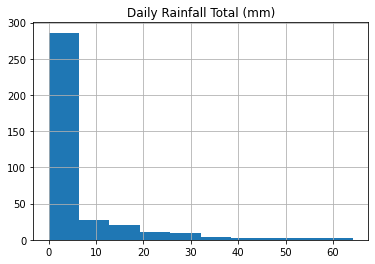

In [275]:
df_2020.hist()  # This function calls matplotlib.pyplot.hist()

Alternatively, `dataframe.plot()` could handle this by setting another argument `kind='hist'`.

<AxesSubplot:ylabel='Frequency'>

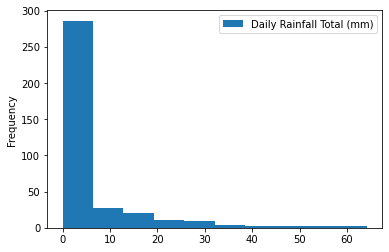

In [276]:
df_2020.plot(kind='hist')

The density plot can be created by simply changing an argument.

<AxesSubplot:ylabel='Density'>

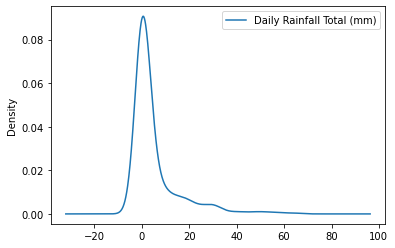

In [277]:
df_2020.plot(kind='kde')
# df_2020.plot(kind='density'), same as kind='kde'

### Box plots

Here, we follow the codes in Pandas Tutorial (Advanced) to calculate the monthly cumulative rainfall and generate a box plot for monthly rainfall in different years. The `resample()` function in `pandas` is utilized. You may refer to Pandas Tutorial (Advanced) for more details.

In [278]:
dfmonth = df.resample('M').sum()
dfmonth = pd.concat([i[1].reset_index(drop=True) for i in dfmonth.loc['1981':'2020',:].groupby(pd.Grouper(freq='Y'))], axis=1)
dfmonth.columns = range(1981, 2021)
dfmonth.index = range(1, 13)
dfmonth.columns.name = 'year'
dfmonth.index.name = 'month'

You can call `matplotlib.pyplot.hist()` to generate box plots.

Text(0.5, 0, 'year')

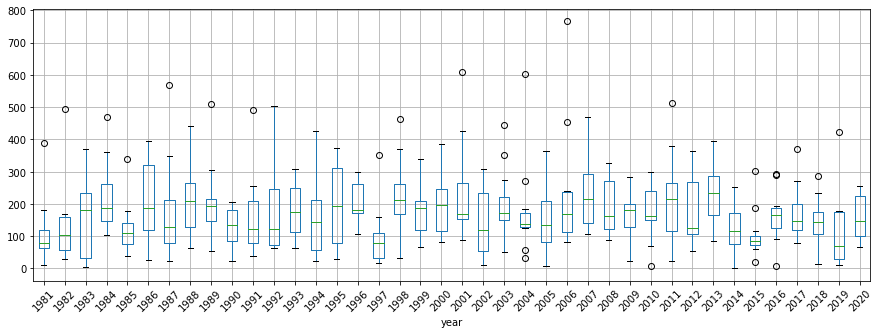

In [279]:
ax = dfmonth.boxplot(figsize=(15,5))
ax.set_xticklabels(dfmonth.columns,rotation=45)
ax.set_xlabel('year')

Alternatively, `dataframe.plot()` could handle this by setting another argument `kind='box'`.

Text(0.5, 0, 'year')

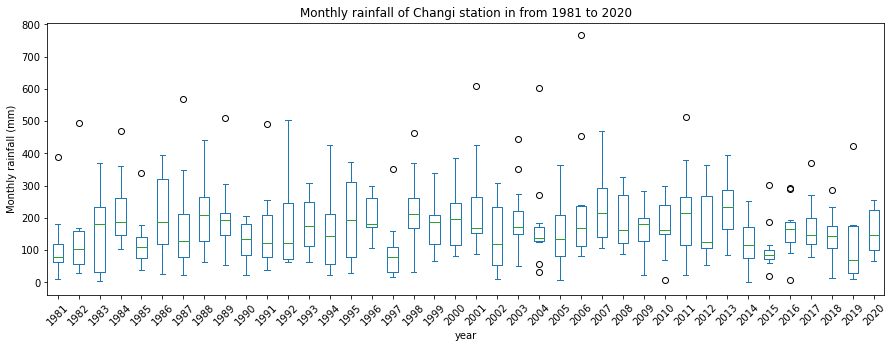

In [280]:
ax = dfmonth.plot(title='Monthly rainfall of Changi station in from 1981 to 2020', xlabel='year', 
             ylabel='Monthly rainfall (mm)', kind='box', figsize=(15,5))
ax.set_xticklabels(dfmonth.columns,rotation=45)
ax.set_xlabel('year')

### Lag plots

Previous observations in a time series are called lags, with the observation at the previous time step called lag1, the observation at two time steps ago lag2, and so on.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the lag plot, which is a special type of scatter plot. It could be realized by the `lag_plot()` function in `pandas.plotting`.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 2)'>

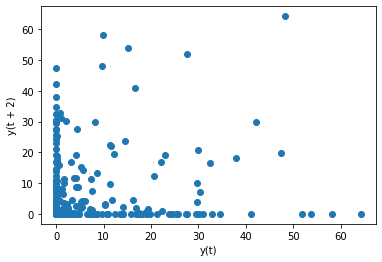

In [281]:
from pandas.plotting import lag_plot

lag_plot(df_2020['Daily Rainfall Total (mm)'], 2)

The above result shows that there is no strong correlation between observations and their lag2 values, as the distribution is relatively random.

### Autocorrelation plots

An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. This could be realized by `autocorrelation_plot()` function. 

The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. For example, the autocorrelation with lag 2 is the correlation between the time series elements and the corresponding elements that were observed two time periods earlier. 

Each spike that rises above or falls below the dashed lines is considered to be statistically significant. This means the spike has a value that is significantly different from zero. If a spike is significantly different from zero, that is evidence of autocorrelation. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

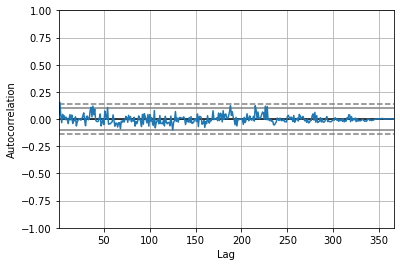

In [282]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_2020['Daily Rainfall Total (mm)'])

In the above example, all values fall within the two dashed lines, showing the evidence against autocorrelation.

## 2D plotting methods

In this section, we will illustrate how to produce 2D plots, including images, contour plots, quiver plots, and stream plots.

### Images

#### Imshow
The most common way to plot images in Matplotlib is with `imshow()`. You may modify multiple arguments to generate the desirable plot.

In [283]:
# generate the data for plotting
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


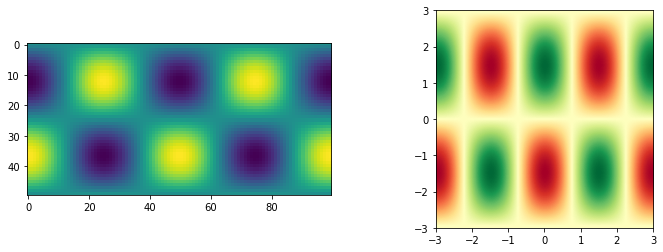

In [284]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
a = ax[0].imshow(f)
ax[1].imshow(f, interpolation='bilinear', cmap=plt.cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(f).max(), vmin=-abs(f).max())

#### Pcolor/pcolormesh

`pcolor` or ` pcolormesh` is another method to create images. 

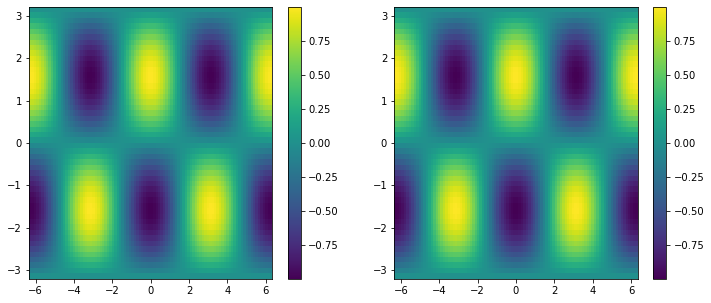

In [285]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))

# the following two inputs have the same effects
pc0 = ax[0].pcolormesh(x1d, y1d, f, shading='auto')
pc1 = ax[1].pcolormesh(xx, yy, f, shading='auto')

# generate color bar
fig.colorbar(pc0, ax=ax[0])  
fig.colorbar(pc1, ax=ax[1])

### Contour plots

The following example basically plots the same thing as above. The only difference is that contours are substituted for colored pixels.

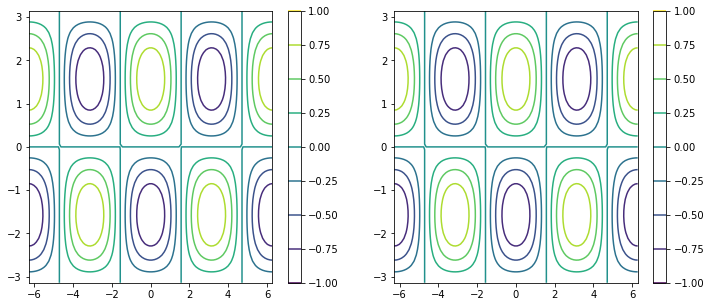

In [286]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
pc0 = ax[0].contour(x1d, y1d, f)
pc1 = ax[1].contour(xx, yy, f)

# generate color bar
fig.colorbar(pc0, ax=ax[0])  
fig.colorbar(pc1, ax=ax[1])

### Quiver plots

Quiver plots are for 2D fields of arrows. It is often used for vectors, such as wind velocity.

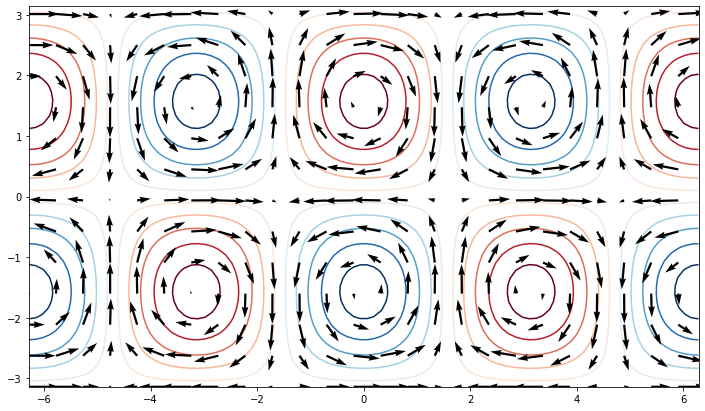

In [287]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

clevels = np.arange(-1, 1, 0.2) + 0.1  #  draw contour lines at the specified levels

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

### Stream plots

`streamplot()` draws streamlines of a vector flow.

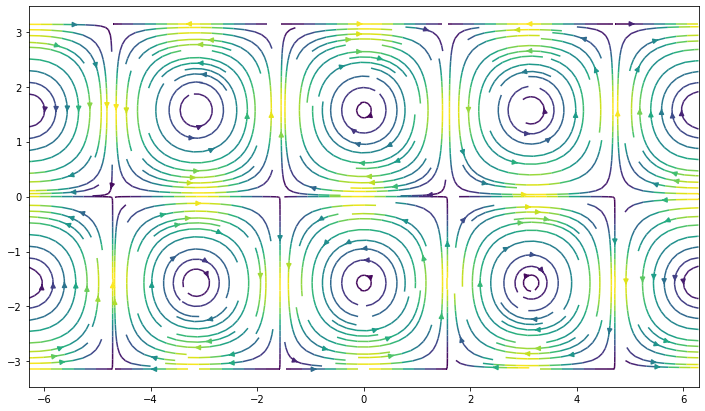

In [288]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

After this tutorial, you should have had a basic idea of which functions to choose for a specific type of plot. For more details on the functions, please refer to the documentations listed below in the References.

## References

* [Matplotlib documentation](https://matplotlib.org/stable/contents.html)
* [Pandas documentation](https://pandas.pydata.org/docs/)
* [A beginner’s advice for learning matplotlib](https://junye0798.com/post/plt-xxx-or-ax-xxx-that-is-the-question-in-matplotlib/)
* [Applied Data Science with Python Specialization](https://www.coursera.org/specializations/data-science-python)
* [Plot Time Series in Python](https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/)
* [Research Computing in Earth Sciences-More Matplotlib](https://rabernat.github.io/research_computing_2018/more-matplotlib.html)
* [Time Series Data Visualization with Python](https://machinelearningmastery.com/time-series-data-visualization-with-python/)